# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

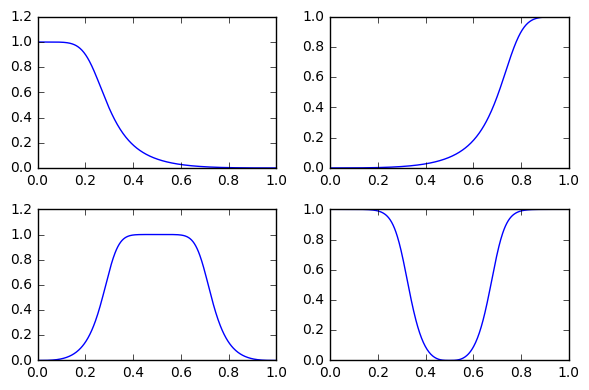

In [2]:
n1, d1 = signal.butter(3, 0.25)
w1, h1 = signal.freqz(n1, d1)
# High pass
n2, d2 = signal.butter(3, 0.75, 'highpass')
w2, h2 = signal.freqz(n2, d2)
# Band pass
n3, d3 = signal.butter(3, [0.3, 0.7], 'bandpass')
w3, h3 = signal.freqz(n3, d3)
# Band stop
n4, d4 = signal.butter(3, [0.3, 0.7], 'bandstop')
w4, h4 = signal.freqz(n4, d4)

# Butterworth filter
plt.figure
plt.subplot(221)
plt.plot(w1/np.pi,np.abs(h1))
plt.subplot(222)
plt.plot(w2/np.pi,np.abs(h2))
plt.figure
plt.subplot(223)
plt.plot(w3/np.pi,np.abs(h3))
plt.subplot(224)
plt.plot(w4/np.pi,np.abs(h4))
plt.tight_layout()


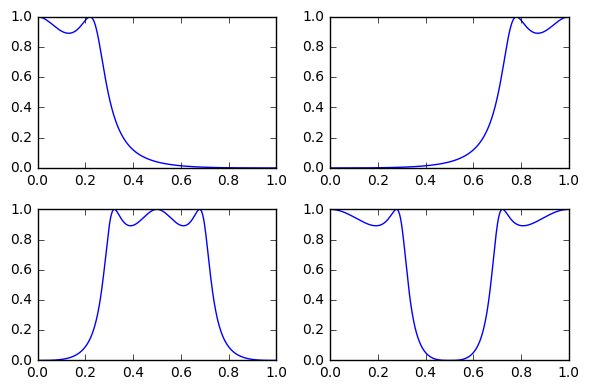

In [3]:
# Chebychev filter
# Lowpass
n1, d1 = signal.cheby1(3, 1, 0.25, 'low')
w1, h1 = signal.freqz(n1, d1)
# Highpass
n2, d2 = signal.cheby1(3, 1, 0.75, 'highpass')
w2, h2 = signal.freqz(n2, d2)
# Passband
n3, d3 = signal.cheby1(3, 1, [0.3, 0.7], 'bandpass')
w3, h3 = signal.freqz(n3, d3)
# Bandstop
n4, d4 = signal.cheby1(3, 1, [0.3, 0.7], 'bandstop')
w4, h4 = signal.freqz(n4, d4)

# Chebychev_I filter
plt.figure
plt.subplot(221)
plt.plot(w1/np.pi,np.abs(h1))
plt.subplot(222)
plt.plot(w2/np.pi,np.abs(h2))
plt.figure
plt.subplot(223)
plt.plot(w3/np.pi,np.abs(h3))
plt.subplot(224)
plt.plot(w4/np.pi,np.abs(h4))
plt.tight_layout()


**1.2**

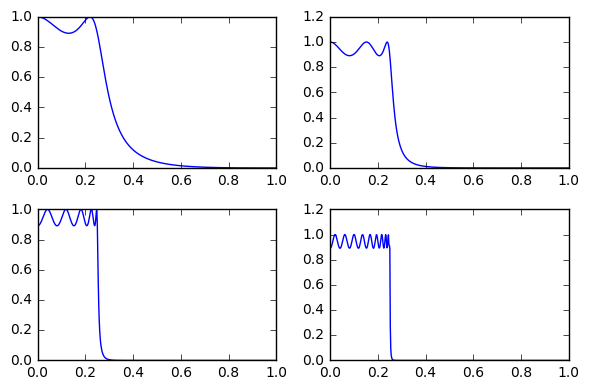

In [4]:
# Lowpass
n1, d1 = signal.cheby1(3, 1, 0.25, 'low')
w1, h1 = signal.freqz(n1, d1)

n2, d2 = signal.cheby1(5, 1, 0.25, 'low')
w2, h2 = signal.freqz(n2, d2)

n3, d3 = signal.cheby1(10, 1, 0.25, 'low')
w3, h3 = signal.freqz(n3, d3)

n4, d4 = signal.cheby1(20, 1, 0.25, 'low')
w4, h4 = signal.freqz(n4, d4)

# Chebychev_I filter
plt.figure
plt.subplot(221)
plt.plot(w1/np.pi,np.abs(h1))
plt.subplot(222)
plt.plot(w2/np.pi,np.abs(h2))
plt.figure
plt.subplot(223)
plt.plot(w3/np.pi,np.abs(h3))
plt.subplot(224)
plt.plot(w4/np.pi,np.abs(h4))
plt.tight_layout()

# As we can see from the plots, the transition from passed frequencies to rejected frequencies is better when we 
# increase the order of the filter but the ripple increases (oscillations).

## Recursive filter 

**2.1**

In [5]:
# Dirac function
def dirac(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Place the dirac
    s[n] = 1
    
    return s
# =====================================================
x = dirac(20,40)
Ts = 0.5
s = 1.5 # scaling factor
alpha = s*Ts
a = np.exp(-alpha)


**2.2**

<Container object of 3 artists>

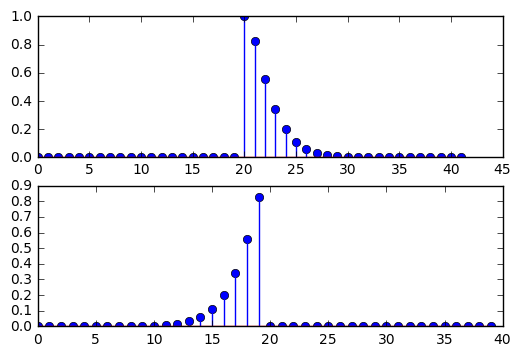

In [6]:
y = np.zeros(42)
for i in range(2,40):
    y[i] = 2*a*y[i-1] - a**2*y[i-2] + x[i] + a*(alpha-1)*x[i-1]

    
ya = np.zeros(40)
for i in range(37, 0, -1):
    ya[i] = 2*a*ya[i+1] - a**2*ya[i+2] + a*(alpha+1)*x[i+1] - a**2*x[i+2]
 
plt.figure
plt.subplot(211)
plt.stem(y)
plt.subplot(212)
plt.stem(ya)



**2.3**

<Container object of 3 artists>

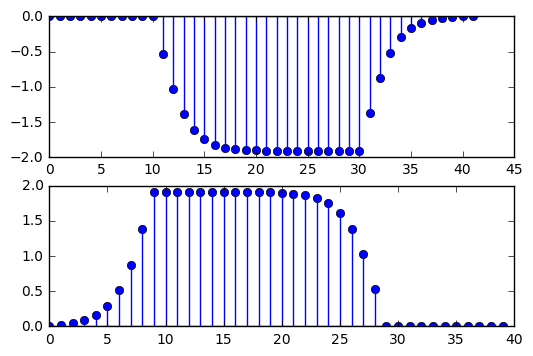

In [7]:
# Step function
def step(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Create the ramp
    for idx_s in np.arange(n, N):
        s[idx_s] = 1
    
    return s
# =====================================================
x2 = step(10, 40) - step(30, 40)

y = np.zeros(42)
for i in range(0,40): # Causal
    y[i] = 2*a*y[i-1] - a**2*y[i-2] - s*alpha*a*x2[i-1]
    
ya = np.zeros(40)
for i in range(37, 0, -1): # Anticausal
    ya[i] = 2*a*ya[i+1] - a**2*ya[i+2] + s*alpha*a*x2[i+1]

plt.figure
plt.subplot(211)
plt.stem(y)
plt.subplot(212)
plt.stem(ya)




**2.4**

In [8]:
# As we can see, when applying the derivative filter, it is highliting the edges. 
# When we sum up the causal and anticausal parts we will have the edges highlighted.

**3.1**

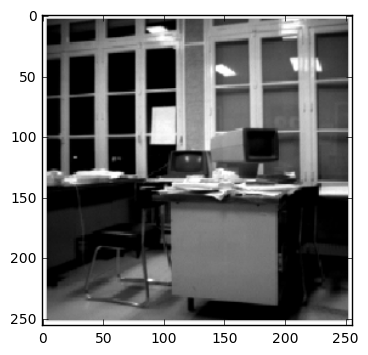

In [9]:
image = plt.imread('../images/bureau.gif')
plt.imshow(image, cmap='gray')

**3.2** , **3.3**

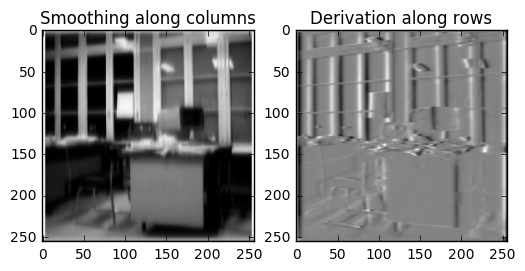

In [26]:
size = image.shape

# Smoothing along columns
yc = np.zeros((256, 256))
ya = np.zeros((256, 256))
out = np.zeros((256, 256))

for i in range(0, 256):
    for j in range(0, 256):
        yc[j][i] = 2*a*yc[j-1][i] - a**2*yc[j-2][i] + image[j][i] + a*(alpha-1)*image[j-1][i] 
        
for i in range(0, 256):
    for j in range(254, 0, -1):
        ya[j][i] = 2*a*ya[j+1][i] - a**2*ya[j+1][i] + a*(alpha+1)*image[j+1][i] - a**2*image[j+1][i]
        
for i in range(0, 256):
    for j in range(0, 256):
        out[i][j] = yc[i][j] + ya[i][j]

# Applying the derivative filter along the rows
yc = np.zeros((256, 256))
ya = np.zeros((256, 256))
out2 = np.zeros((256, 256))

for j in range(0, 256):
    for i in range(0, 256):
        yc[j][i] = 2*a*yc[j][i-1] - a**2*yc[j][i-2] - s*alpha*a*image[j][i-1]

for j in range(0, 256):
    for i in range(253, 0, -1):
        ya[j][i] = 2*a*ya[j][i+1] - a**2*ya[j][i+2] + s*alpha*a*image[j][i+1]
        
for i in range(0, 256):
    for j in range(0, 256):
        out2[i][j] = yc[i][j] + ya[i][j]
        
# Applying Smoothing along rows
yc = np.zeros((256, 256))
ya = np.zeros((256, 256))
out3 = np.zeros((256, 256))

for j in range(0, 256):
    for i in range(0, 256):
        yc[j][i] = 2*a*yc[j][i-1] - a**2*yc[j][i-2] + image[j][i] + a*(alpha-1)*image[j][i-1] 
        
for j in range(0, 256):
    for i in range(253, 0, -1):
        ya[j][i] = 2*a*ya[j][i+1] - a**2*ya[j][i+1] + a*(alpha+1)*image[j][i+1] - a**2*image[j][i+1]
        
for i in range(0, 256):
    for j in range(0, 256):
        out3[i][j] = yc[i][j] + ya[i][j]
        
# Derivation along columns
yc = np.zeros((256, 256))
ya = np.zeros((256, 256))
out4 = np.zeros((256, 256))

for i in range(0, 256):
    for j in range(0, 256):
        yc[j][i] = 2*a*yc[j-1][i] - a**2*yc[j-2][i] - s*alpha*a*image[j-1][i]

for i in range(0, 256):
    for j in range(253, 0, -1):
        ya[j][i] = 2*a*ya[j+1][i] - a**2*ya[j+2][i] + s*alpha*a*image[j+1][i]
        
for i in range(0, 256):
    for j in range(0, 256):
        out4[i][j] = yc[i][j] + ya[i][j]        
    
    
plt.figure    
plt.subplot(121)
plt.imshow(out, cmap='gray')
plt.title('Smoothing along columns')
plt.subplot(122)      
plt.imshow(out2, cmap='gray')
plt.title('Derivation along rows')


**3.4**

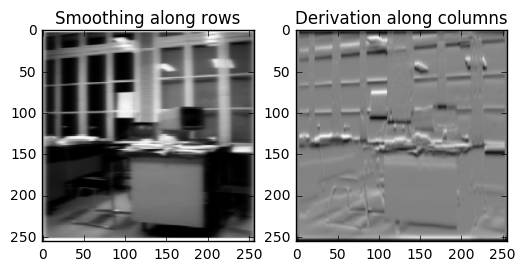

In [27]:
plt.figure
plt.subplot(121)      
plt.imshow(out3, cmap='gray')
plt.title('Smoothing along rows')
plt.subplot(122)      
plt.imshow(out4, cmap='gray')
plt.title('Derivation along columns')